In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [2]:
car=pd.read_csv("cardekho_data.csv")

In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
petro_car=car[car['Fuel_Type']=="Petrol"]
car_name=petro_car['Car_Name'].unique()
print(car_name)

['ritz' 'ciaz' 'wagon r' 'alto 800' 'ertiga' 'dzire' 'sx4' 'alto k10'
 'ignis' 'swift' '800' 'baleno' 'omni' 'innova' 'corolla altis'
 'etios cross' 'etios g' 'etios liva' 'corolla' 'camry'
 'Royal Enfield Thunder 500' 'UM Renegade Mojave' 'KTM RC200'
 'Bajaj Dominar 400' 'Royal Enfield Classic 350' 'KTM RC390'
 'Hyosung GT250R' 'Royal Enfield Thunder 350' 'KTM 390 Duke '
 'Mahindra Mojo XT300' 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splender iSmart' 'Activa 3g'
 'Hero Passion Pro' 'Honda CB Trigger' 'Y

In [6]:
car.shape

(301, 9)

In [7]:
car.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [8]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

##### Visualize distribution of numerical features

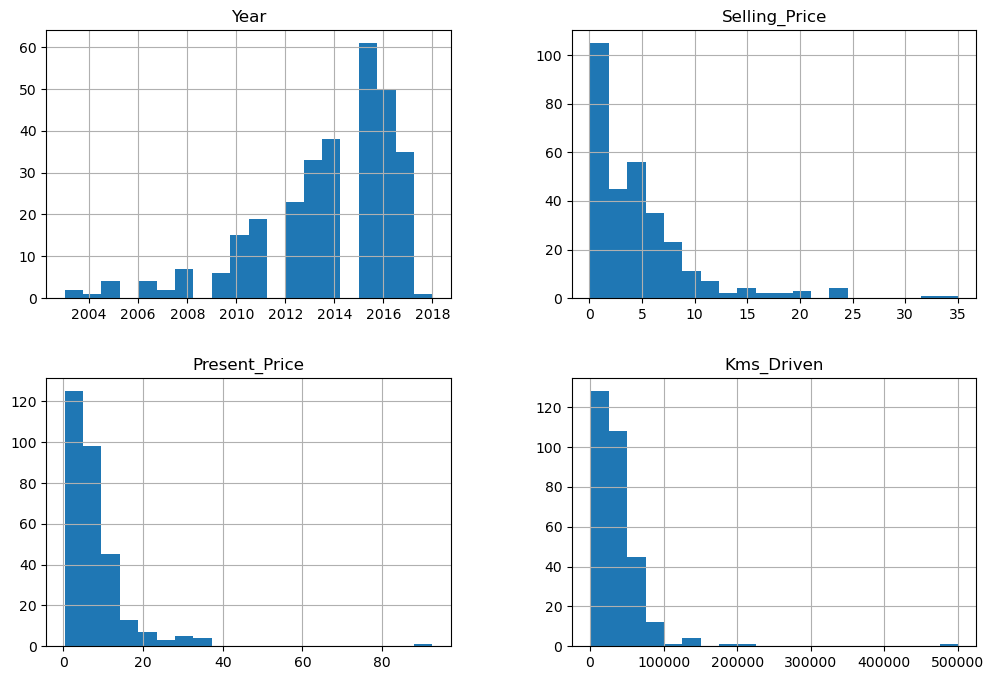

In [9]:

car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']].hist(bins=20, figsize=(12, 8))
plt.show()

##### Explore relationships between features and target variable

C:\Users\kande\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


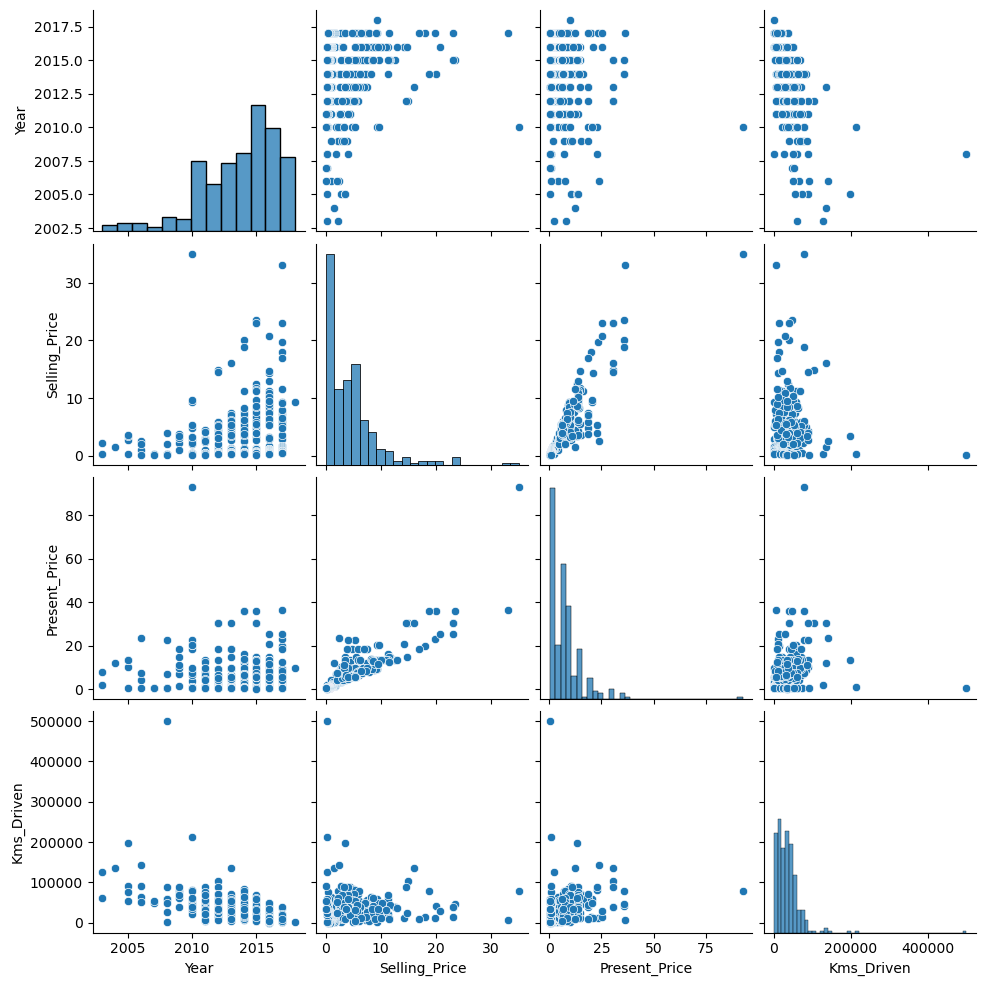

In [10]:
sns.pairplot(car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']])
plt.show()

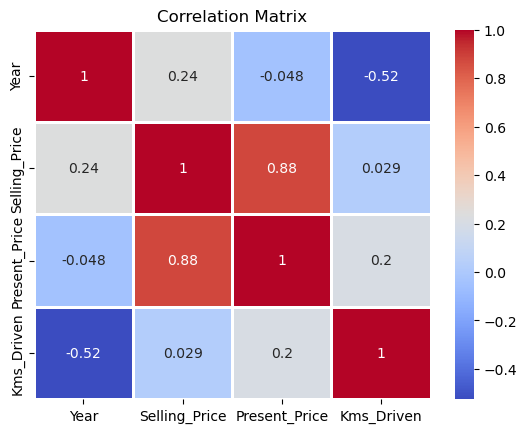

In [11]:
correlation_matrix = car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=2)
plt.title("Correlation Matrix")
plt.show()

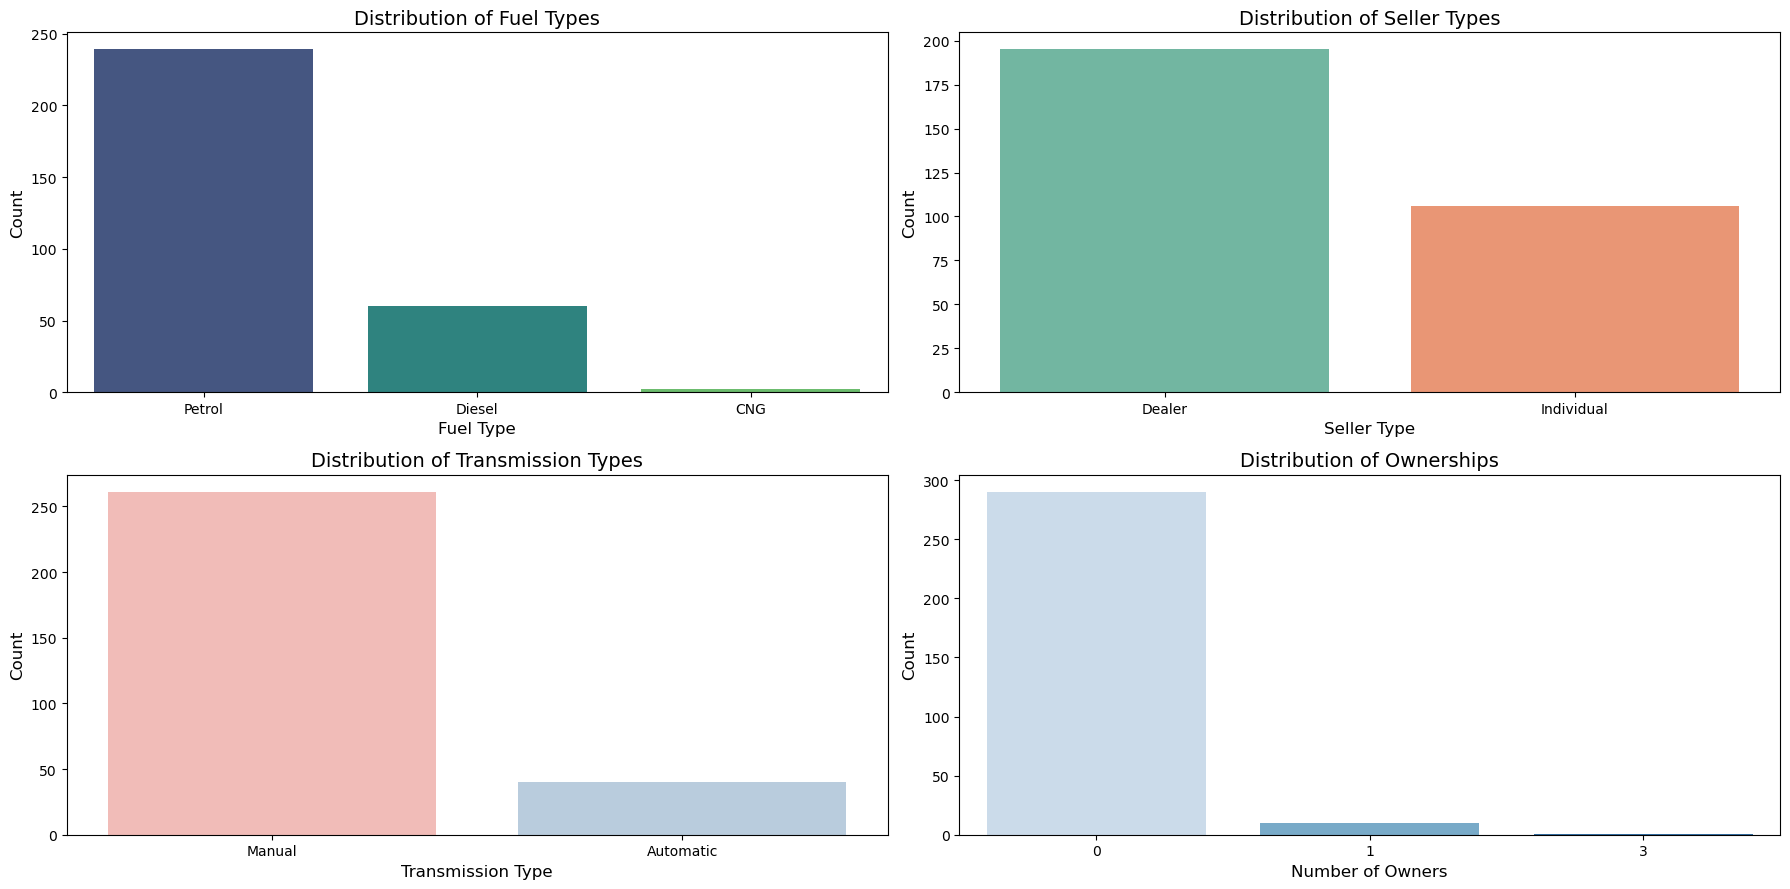

In [12]:
# Improved count plots for categorical features
plt.figure(figsize=(18, 9))

plt.subplot(2, 2, 1)
sns.countplot(x='Fuel_Type', data=car, palette='viridis')
plt.title('Distribution of Fuel Types', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(2, 2, 2)
sns.countplot(x='Seller_Type', data=car, palette='Set2')
plt.title('Distribution of Seller Types', fontsize=14)
plt.xlabel('Seller Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(2, 2, 3)
sns.countplot(x='Transmission', data=car, palette='Pastel1')
plt.title('Distribution of Transmission Types', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(2, 2, 4)
sns.countplot(x='Owner', data=car, palette='Blues')
plt.title('Distribution of Ownerships', fontsize=14)
plt.xlabel('Number of Owners', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


In [13]:
# Step 8: Feature Engineering
# Assuming 'Year' is an important feature, we can create a new feature 'Car_Age'
car['Car_Age'] = 2024 - car['Year']

In [14]:
car['Car_Age']

0      10
1      11
2       7
3      13
4      10
       ..
296     8
297     9
298    15
299     7
300     8
Name: Car_Age, Length: 301, dtype: int64

In [15]:
# Drop columns that won't be used in the model
# car= df.drop(['Car_Name', 'Year'], axis=1)
# Drop the 'Car_Name' column as it is not suitable for modeling
car = car.drop('Car_Name', axis=1)

In [16]:
# Step 9: Handle Categorical Variables
# Convert categorical variables into numerical using one-hot encoding
car = pd.get_dummies(car, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

In [17]:
car

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,10,False,True,False,True
1,2013,4.75,9.54,43000,0,11,True,False,False,True
2,2017,7.25,9.85,6900,0,7,False,True,False,True
3,2011,2.85,4.15,5200,0,13,False,True,False,True
4,2014,4.60,6.87,42450,0,10,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,8,True,False,False,True
297,2015,4.00,5.90,60000,0,9,False,True,False,True
298,2009,3.35,11.00,87934,0,15,False,True,False,True
299,2017,11.50,12.50,9000,0,7,True,False,False,True


In [18]:
# Step 10: Split the data into features (X) and target variable (y)
X = car.drop('Selling_Price', axis=1)
y = car['Selling_Price']

In [19]:
X

,Year,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,10,False,True,False,True
1,2013,9.54,43000,0,11,True,False,False,True
2,2017,9.85,6900,0,7,False,True,False,True
3,2011,4.15,5200,0,13,False,True,False,True
4,2014,6.87,42450,0,10,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,8,True,False,False,True
297,2015,5.90,60000,0,9,False,True,False,True
298,2009,11.00,87934,0,15,False,True,False,True
299,2017,12.50,9000,0,7,True,False,False,True


In [20]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [21]:
#  Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [22]:
# Display the modified DataFrame
car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,10,False,True,False,True
1,2013,4.75,9.54,43000,0,11,True,False,False,True
2,2017,7.25,9.85,6900,0,7,False,True,False,True
3,2011,2.85,4.15,5200,0,13,False,True,False,True
4,2014,4.60,6.87,42450,0,10,True,False,False,True


In [23]:
# Step 12: Import the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Step 13: Initialize the model
model = RandomForestRegressor(random_state=42)

# Step 14: Train the model on the training set
model.fit(X_train, y_train)

# Step 15: Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 16: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.6068672131147544
Mean Squared Error: 0.8237630850819666
R-squared: 0.9642395405961426


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Metrics:
Mean Absolute Error: 0.6052062287070686
Mean Squared Error: 0.8142087174247858
R-squared: 0.9646543061797449


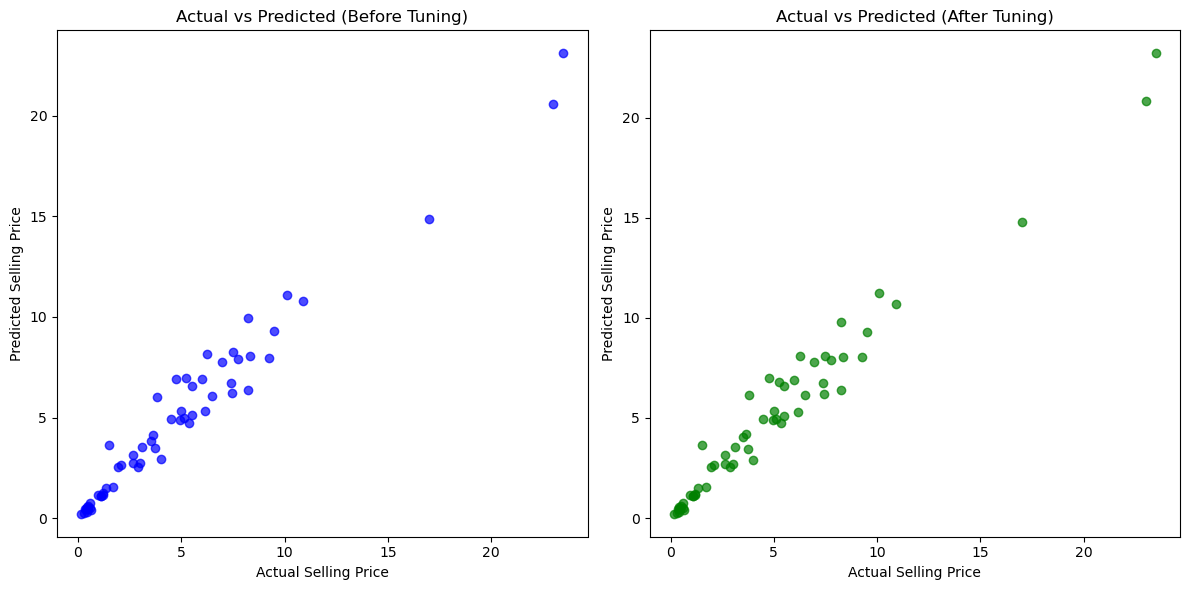

In [24]:
# Step 17: Hyperparameter Tuning
# You can use techniques like Grid Search or Random Search to find optimal hyperparameters



# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Step 18: Evaluate the model with tuned hyperparameters
# Initialize the model with the best hyperparameters
best_model = RandomForestRegressor(random_state=42, **best_params)

# Train the model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_tuned = best_model.predict(X_test)

# Evaluate the model with tuned hyperparameters
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Metrics:')
print(f'Mean Absolute Error: {mae_tuned}')
print(f'Mean Squared Error: {mse_tuned}')
print(f'R-squared: {r2_tuned}')

# Step 19: Visualize Predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.title('Actual vs Predicted (Before Tuning)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tuned, color='green', alpha=0.7)
plt.title('Actual vs Predicted (After Tuning)')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')

plt.tight_layout()
plt.show()


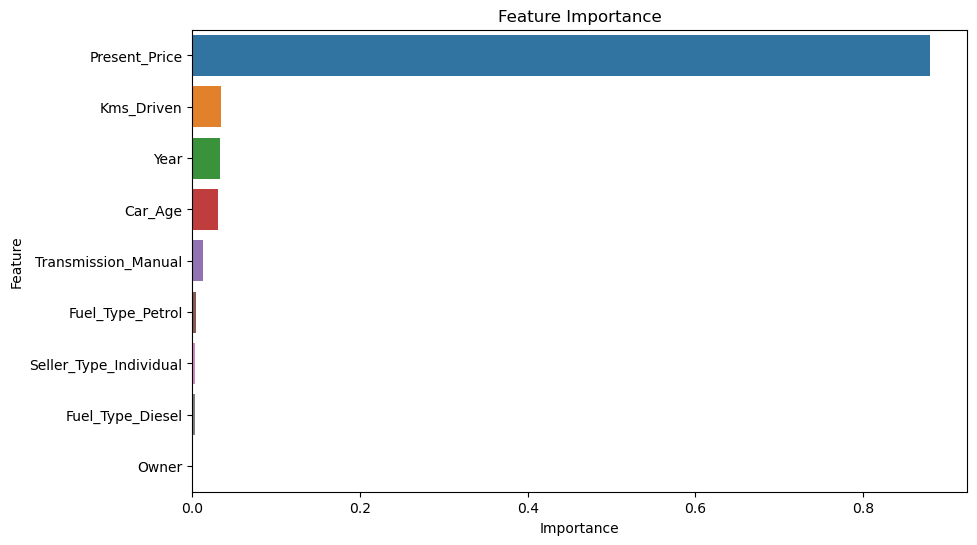

In [25]:
# Step 20: Feature Importance
# Explore feature importance to understand which features contribute the most to the predictions

feature_importance = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In conclusion, the journey of building a used car price prediction model involves several key steps. Here's a summary of the major stages we covered:

Data Analysis:

Explored the dataset, identified columns, and checked for missing values.
Visualized distributions and relationships between features.
Explored correlations between numerical variables.
Examined the distribution of categorical variables.
Data Preprocessing:

Handled missing values (dropped rows for simplicity).
Engineered new features ('Car_Age') based on existing ones.
Dropped irrelevant columns ('Car_Name') and encoded categorical variables using one-hot encoding.
Modeling:

Selected RandomForestRegressor as the machine learning model.
Split the dataset into training and testing sets.
Trained the initial model and evaluated its performance.
Hyperparameter Tuning:

Utilized GridSearchCV to find the optimal hyperparameters for the RandomForestRegressor.
Re-trained the model with the best hyperparameters.
Evaluation and Visualization:

Evaluated the model's performance using metrics like Mean Absolute Error, Mean Squared Error, and R-squared.
Visualized predictions before and after hyperparameter tuning.
Feature Importance:

Explored the importance of different features in the model using feature importance scores.
Model Deployment (Optional):

Explored the optional step of deploying the model for making predictions on new data.
Saved the model using joblib and provided a placeholder for loading the model in a deployment scenario.
Additional Considerations:

Considered ongoing tasks such as monitoring the model's performance over time and potential updates.
Mentioned the use of cross-validation for more robust evaluation.